<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Using-a-DataFrame" data-toc-modified-id="Using-a-DataFrame-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using a DataFrame</a></span><ul class="toc-item"><li><span><a href="#Considering-a-single-agent-stats" data-toc-modified-id="Considering-a-single-agent-stats-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Considering a single agent stats</a></span></li><li><span><a href="#Constructing-report-dataset" data-toc-modified-id="Constructing-report-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Constructing report dataset</a></span></li><li><span><a href="#Examining-winning-agent" data-toc-modified-id="Examining-winning-agent-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Examining winning agent</a></span><ul class="toc-item"><li><span><a href="#Keeping-Informations-about-the-competing-agent" data-toc-modified-id="Keeping-Informations-about-the-competing-agent-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Keeping Informations about the competing agent</a></span></li></ul></li></ul></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Visualization</a></span></li></ul></div>

## Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import operator
pd.set_option('display.max_columns', 50)
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('allAnac.csv',';', skiprows=1)
df.head()

,Run time (s),Round,Exception,deadline,Agreement,Discounted,#agreeing,min.util.,max.util.,Dist. to Pareto,Dist. to Nash,Social Welfare,Agent 1,Agent 2,Utility 1,Utility 2,Disc. Util. 1,Disc. Util. 2,Perceived. Util. 1,Perceived. Util. 2,User Bother 1,User Bother 2,User Util. 1,User Util. 2,Profile 1,Profile 2
0,0.194,61,NaN,60rounds,No,No,1,0.00000,0.00000,1.03604,1.21592,0.00000,Agent_K@0,KLH@1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,party1_utility.xml,party2_utility.xml
1,0.110,59,NaN,60rounds,Yes,No,2,0.66621,0.94167,0.00000,0.30558,1.60787,KLH@2,Agent_K@3,0.941667,0.666208,0.941667,0.666208,0.0,0.0,0.0,0.0,0.941667,0.666208,party1_utility.xml,party2_utility.xml
2,0.111,61,NaN,60rounds,No,No,1,0.00000,0.00000,1.03604,1.21592,0.00000,Gahboninho@4,Agent_K@5,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,party1_utility.xml,party2_utility.xml
3,1.162,44,NaN,60rounds,Yes,No,2,0.78500,0.92857,0.00000,0.00000,1.71357,IAMhaggler2011@6,Agent_K@7,0.785000,0.928565,0.785000,0.928565,0.0,0.0,0.0,0.0,0.785000,0.928565,party1_utility.xml,party2_utility.xml
4,0.111,61,NaN,60rounds,No,No,1,0.00000,0.00000,1.03604,1.21592,0.00000,CUHKAgent@8,Agent_K@9,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,party1_utility.xml,party2_utility.xml


In [3]:
for i in range(0, df.shape[0]):
    df['Agent 1'][i] = df['Agent 1'][i].split('@', 1)[0]
    df['Agent 2'][i] = df['Agent 2'][i].split('@', 1)[0]

df.head(7)

,Run time (s),Round,Exception,deadline,Agreement,Discounted,#agreeing,min.util.,max.util.,Dist. to Pareto,Dist. to Nash,Social Welfare,Agent 1,Agent 2,Utility 1,Utility 2,Disc. Util. 1,Disc. Util. 2,Perceived. Util. 1,Perceived. Util. 2,User Bother 1,User Bother 2,User Util. 1,User Util. 2,Profile 1,Profile 2
0,0.194,61,NaN,60rounds,No,No,1,0.00000,0.00000,1.03604,1.21592,0.00000,Agent_K,KLH,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,party1_utility.xml,party2_utility.xml
1,0.110,59,NaN,60rounds,Yes,No,2,0.66621,0.94167,0.00000,0.30558,1.60787,KLH,Agent_K,0.941667,0.666208,0.941667,0.666208,0.0,0.0,0.0,0.0,0.941667,0.666208,party1_utility.xml,party2_utility.xml
2,0.111,61,NaN,60rounds,No,No,1,0.00000,0.00000,1.03604,1.21592,0.00000,Gahboninho,Agent_K,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,party1_utility.xml,party2_utility.xml
3,1.162,44,NaN,60rounds,Yes,No,2,0.78500,0.92857,0.00000,0.00000,1.71357,IAMhaggler2011,Agent_K,0.785000,0.928565,0.785000,0.928565,0.0,0.0,0.0,0.0,0.785000,0.928565,party1_utility.xml,party2_utility.xml
4,0.111,61,NaN,60rounds,No,No,1,0.00000,0.00000,1.03604,1.21592,0.00000,CUHKAgent,Agent_K,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,party1_utility.xml,party2_utility.xml
5,0.119,61,NaN,60rounds,No,No,1,0.00000,0.00000,1.03604,1.21592,0.00000,TimeDependentAgentHardliner,Agent_K,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,party1_utility.xml,party2_utility.xml
6,0.016,3,NaN,60rounds,Yes,No,2,0.65833,1.00000,0.00000,0.14542,1.65833,AgentM,Agent_K,0.658333,1.000000,0.658333,1.000000,0.0,0.0,0.0,0.0,0.658333,1.000000,party1_utility.xml,party2_utility.xml


In [4]:
print(df.shape)
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)[0:3]

(342, 26)


,percent_missing
Exception,76.315789
Run time (s),23.684211
User Util. 2,23.684211


Checking if all agents played the same amount of matches (before deleting failed tournament)

In [5]:
df['Agent 1'].value_counts()

Agent_K                        18
AgentM                         18
AgentLG                        18
atlas                          18
Atlas32016                     18
Gahboninho                     18
JonnyBlack                     18
Mercury                        18
Rubick                         18
CUHKAgent                      18
IAMhaggler2011                 18
ParsAgent                      18
KLH                            18
PonPokoAgent                   18
CaduceusDC16                   18
YXAgent                        18
MetaAgent2013                  18
TheFawkes                      18
TimeDependentAgentHardliner    18
Name: Agent 1, dtype: int64

In [6]:
df['Agent 2'].value_counts()

Agent_K                        18
AgentM                         18
AgentLG                        18
atlas                          18
Atlas32016                     18
Gahboninho                     18
JonnyBlack                     18
Mercury                        18
Rubick                         18
CUHKAgent                      18
IAMhaggler2011                 18
ParsAgent                      18
KLH                            18
PonPokoAgent                   18
CaduceusDC16                   18
YXAgent                        18
MetaAgent2013                  18
TheFawkes                      18
TimeDependentAgentHardliner    18
Name: Agent 2, dtype: int64

In [7]:
df = df.drop('Exception', axis=1).dropna()
df = df.reset_index()

Checking if all agents played the same amount of matches (after deleting failed tournament)

In [8]:
df['Agent 1'].value_counts()

CUHKAgent                      16
Gahboninho                     16
KLH                            16
TimeDependentAgentHardliner    16
AgentM                         16
PonPokoAgent                   16
AgentLG                        16
YXAgent                        16
ParsAgent                      16
Agent_K                        16
atlas                          15
TheFawkes                      15
IAMhaggler2011                 15
Atlas32016                     15
MetaAgent2013                  14
JonnyBlack                     13
Mercury                        13
Rubick                          1
Name: Agent 1, dtype: int64

In [9]:
df['Agent 2'].value_counts()

AgentM                         17
CUHKAgent                      16
AgentLG                        16
Agent_K                        16
KLH                            16
IAMhaggler2011                 16
TimeDependentAgentHardliner    16
TheFawkes                      16
MetaAgent2013                  16
Gahboninho                     16
PonPokoAgent                   16
Atlas32016                     15
atlas                          15
YXAgent                        15
Mercury                        15
ParsAgent                      14
JonnyBlack                      9
Rubick                          1
Name: Agent 2, dtype: int64

## Using a DataFrame

### Considering a single agent stats

In [10]:
def single_agent_focus(agent_name):
    one = df[df['Agent 1'] == agent_name] 
    two = df[df['Agent 2'] == agent_name]
    one = one.drop(["Agent 2", "Utility 2","Disc. Util. 2", "Perceived. Util. 2",
                    "User Bother 2", "User Util. 2", "Profile 2"], axis=1)
    two = two.drop(["Agent 1", "Utility 1","Disc. Util. 1", "Perceived. Util. 1",
                    "User Bother 1", "User Util. 1", "Profile 1"], axis=1)
    two = two.rename(columns={"Agent 2" : "Agent 1", "Utility 2": "Utility 1",
                              "Disc. Util. 2": "Disc. Util. 1", "Perceived. Util. 2": "Perceived. Util. 1",
                              "User Bother 2" : "User Bother 1", "User Util. 2": "User Util. 1", 
                              "Profile 2": "Profile 1"})
    result = pd.concat([one, two])
    return result

result = single_agent_focus('Atlas32016')

percentage error = [experimental value - theoretical value] / theoretical value x 100%

In [11]:
np.mean(result['Utility 1']), np.mean(result['User Util. 1']), np.mean(result['Perceived. Util. 1'])

(0.7176865612542762, 0.7176865612542762, 0.7176865612542762)

In [12]:
(np.mean(result['Perceived. Util. 1']) - np.mean(result['Utility 1']))/np.mean(result['Utility 1'])*100

0.0

In [13]:
print('Percentage Error %')
result = result.reset_index(drop=True)
perc_error = []
for i in range(0, result.shape[0]):
    perc_error.append((result['Perceived. Util. 1'][i] - result['Utility 1'][i])/(result['Utility 1'][i]+1e-9)*100)

np.mean(perc_error)

Percentage Error %


0.0

percent error = [theoretical value - experimental value] / experimental value x 100%

In [14]:
print('Percent Error %')
percent_error = []
for i in range(0, result.shape[0]):
    percent_error.append((abs(result['Utility 1'][i] - 
                              result['Perceived. Util. 1'][i]))/(result['Perceived. Util. 1'][i] +1e-9)*100)
    
np.mean(percent_error)

Percent Error %


0.0

In [15]:
agents = np.unique(np.append(df['Agent 1'].unique(), df['Agent 2'].unique()))

mean_nash = []
std_nash = []
mean_utility = []
std_utility = []
for i in agents:
    result = single_agent_focus(i)
    mean_nash.append(np.mean(result['Dist. to Nash']))
    std_nash.append(np.std(result['Dist. to Nash']))
    mean_utility.append(np.mean(result['Utility 1']))
    std_utility.append(np.std(result['Utility 1']))

### Constructing report dataset

In [16]:
data = {'Agents Name': agents, 'Overall Utility': np.zeros(len(agents)), 'Total Dist to Nash': np.zeros(len(agents)), 
        'Mean Utility': mean_utility, 'Std Utility': std_utility, 'Mean Nash': mean_nash, 'Std Nash': std_nash} 

final_df = pd.DataFrame(data= data)
res = []
for i in range(0, df.shape[0]):
    final_df['Overall Utility'][final_df['Agents Name'] == df['Agent 1'][i]] += df['Utility 1'][i]
    final_df['Overall Utility'][final_df['Agents Name'] == df['Agent 2'][i]] += df['Utility 2'][i]
    final_df['Total Dist to Nash'][final_df['Agents Name'] == df['Agent 1'][i]] += df['Dist. to Nash'][i]
    final_df['Total Dist to Nash'][final_df['Agents Name'] == df['Agent 2'][i]] += df['Dist. to Nash'][i]
    
final_df['Matches Win'] = np.zeros(len(agents))
final_df['N Matches'] = np.zeros(len(agents))

for i in range(0, df.shape[0]):
    if df['Utility 1'][i] > df['Utility 2'][i]:
        final_df['Matches Win'][final_df['Agents Name'] == df['Agent 1'][i]] += 1
    elif df['Utility 1'][i] < df['Utility 2'][i]:
        final_df['Matches Win'][final_df['Agents Name'] == df['Agent 2'][i]] += 1
    else:
        final_df['Matches Win'][final_df['Agents Name'] == df['Agent 1'][i]] += 0
        final_df['Matches Win'][final_df['Agents Name'] == df['Agent 2'][i]] += 0
    final_df['N Matches'][final_df['Agents Name'] == df['Agent 1'][i]] += 1
    final_df['N Matches'][final_df['Agents Name'] == df['Agent 2'][i]] += 1

    
final_df = final_df[final_df['N Matches'] > 29]
final_df.sort_values(by ='Mean Nash' , ascending=True)

,Agents Name,Overall Utility,Total Dist to Nash,Mean Utility,Std Utility,Mean Nash,Std Nash,Matches Win,N Matches
3,Atlas32016,21.530597,6.44547,0.717687,0.163541,0.214849,0.185467,8.0,30.0
17,atlas,21.055146,7.01984,0.701838,0.184115,0.233995,0.208836,8.0,30.0
1,AgentM,15.939083,13.23188,0.483003,0.180715,0.400966,0.259709,0.0,33.0
6,IAMhaggler2011,17.748031,13.09252,0.572517,0.351106,0.422339,0.485231,7.0,31.0
14,TheFawkes,16.922346,13.82016,0.545882,0.368210,0.445812,0.504699,9.0,31.0
10,MetaAgent2013,16.859009,14.84783,0.561967,0.375522,0.494928,0.463023,11.0,30.0
11,ParsAgent,15.064689,16.61521,0.502156,0.416972,0.553840,0.552402,7.0,30.0
2,Agent_K,15.396428,18.63594,0.481138,0.406504,0.582373,0.539138,6.0,32.0
12,PonPokoAgent,14.108239,22.04633,0.440882,0.443658,0.688948,0.534441,14.0,32.0
0,AgentLG,13.405095,24.90998,0.418909,0.475489,0.778437,0.512717,14.0,32.0


In [17]:
nash_df = final_df.sort_values(by ='Mean Nash' , ascending=True)
nash_df = nash_df.reset_index(drop=True)
nash_df[nash_df['Agents Name'] == 'atlas']

,Agents Name,Overall Utility,Total Dist to Nash,Mean Utility,Std Utility,Mean Nash,Std Nash,Matches Win,N Matches
1,atlas,21.055146,7.01984,0.701838,0.184115,0.233995,0.208836,8.0,30.0


In [18]:
final_df.sort_values(by ='Mean Utility' , ascending=False)

,Agents Name,Overall Utility,Total Dist to Nash,Mean Utility,Std Utility,Mean Nash,Std Nash,Matches Win,N Matches
3,Atlas32016,21.530597,6.44547,0.717687,0.163541,0.214849,0.185467,8.0,30.0
17,atlas,21.055146,7.01984,0.701838,0.184115,0.233995,0.208836,8.0,30.0
6,IAMhaggler2011,17.748031,13.09252,0.572517,0.351106,0.422339,0.485231,7.0,31.0
10,MetaAgent2013,16.859009,14.84783,0.561967,0.375522,0.494928,0.463023,11.0,30.0
14,TheFawkes,16.922346,13.82016,0.545882,0.368210,0.445812,0.504699,9.0,31.0
11,ParsAgent,15.064689,16.61521,0.502156,0.416972,0.553840,0.552402,7.0,30.0
1,AgentM,15.939083,13.23188,0.483003,0.180715,0.400966,0.259709,0.0,33.0
2,Agent_K,15.396428,18.63594,0.481138,0.406504,0.582373,0.539138,6.0,32.0
12,PonPokoAgent,14.108239,22.04633,0.440882,0.443658,0.688948,0.534441,14.0,32.0
0,AgentLG,13.405095,24.90998,0.418909,0.475489,0.778437,0.512717,14.0,32.0


In [19]:
utility_df = final_df.sort_values(by ='Mean Utility' , ascending=False)
utility_df = utility_df.reset_index(drop=True)
utility_df[utility_df['Agents Name'] == 'atlas']

,Agents Name,Overall Utility,Total Dist to Nash,Mean Utility,Std Utility,Mean Nash,Std Nash,Matches Win,N Matches
1,atlas,21.055146,7.01984,0.701838,0.184115,0.233995,0.208836,8.0,30.0


### Examining winning agent

#### Keeping Informations about the competing agent

In [20]:
def agent_focus(agent_name):
    one = df[df['Agent 1'] == agent_name] 
    two = df[df['Agent 2'] == agent_name]
    result = pd.concat([one, two])
    return result

result = agent_focus('Atlas32016')

In [21]:
result.Agreement.value_counts()

Yes    30
Name: Agreement, dtype: int64

In [22]:
np.mean(result['Dist. to Nash'])

0.21484899999999996

## Data Visualization

In [23]:
def nash_plot(name, distance, version):
    score = {}
    for i in range(0, df.shape[0]):
        if df['Agent 1'][i] == str(name):
            try:
                score[df['Agent 2'][i]].append(df[distance][i])
            except KeyError:
                score[df['Agent 2'][i]] = []
                score[df['Agent 2'][i]].append(df[distance][i])
        elif df['Agent 2'][i] == str(name):
            try:
                score[df['Agent 1'][i]].append(df[distance][i])
            except KeyError:
                score[df['Agent 1'][i]] = []
                score[df['Agent 1'][i]].append(df[distance][i])

    plot_opp = []
    plot_dist = []
    for i in score.keys():
        plot_opp.append(i)
        plot_dist.append(np.mean(score[i]))

    figure(num=None, figsize=(5, 3.33), dpi=300, facecolor='w', edgecolor='k')
    plt.title(
        distance + " for " + str(name),
        fontsize=10)
    plt.ylim(0, 2)
    plt.xticks(fontsize=7, rotation=90)
    plt.yticks(fontsize=10)
    if version == 1:
        plt.bar(plot_opp, plot_dist)
    else:
        plt.plot(plot_opp, plot_dist)
    plt.ylabel("Average " + str(distance), fontsize=10)
    plt.xlabel("Opponents",fontsize=10)
    plt.savefig(str(name) + str(distance) + '.jpg', dpi = 300, bbox_inches='tight')
    plt.show()

In [24]:
def utility_plot(name):
    score = {}
    for i in range(0, df.shape[0]):
        if df['Agent 1'][i] == str(name):
            try:
                score[df['Agent 2'][i]].append(df['Utility 1'][i])
            except KeyError:
                score[df['Agent 2'][i]] = []
                score[df['Agent 2'][i]].append(df['Utility 1'][i])
        elif df['Agent 2'][i] == str(name):
            try:
                score[df['Agent 1'][i]].append(df['Utility 2'][i])
            except KeyError:
                score[df['Agent 1'][i]] = []
                score[df['Agent 1'][i]].append(df['Utility 2'][i])

    plot_opp = []
    plot_dist = []
    for i in score.keys():
        plot_opp.append(i)
        plot_dist.append(np.mean(score[i]))

    figure(num=None, figsize=(5, 3.33), dpi=300, facecolor='w', edgecolor='k')
    plt.title(
        "Utility for " + str(name),
        fontsize=10)
    plt.ylim(0, 1.4)
    plt.xticks(fontsize=7, rotation=90)
    plt.yticks(fontsize=10)
    plt.bar(plot_opp, plot_dist)
    plt.ylabel("Average Agent Utility", fontsize=10)
    plt.xlabel("Opponents",fontsize=10)
    plt.savefig(name, dpi = 300, bbox_inches='tight')
    plt.show()

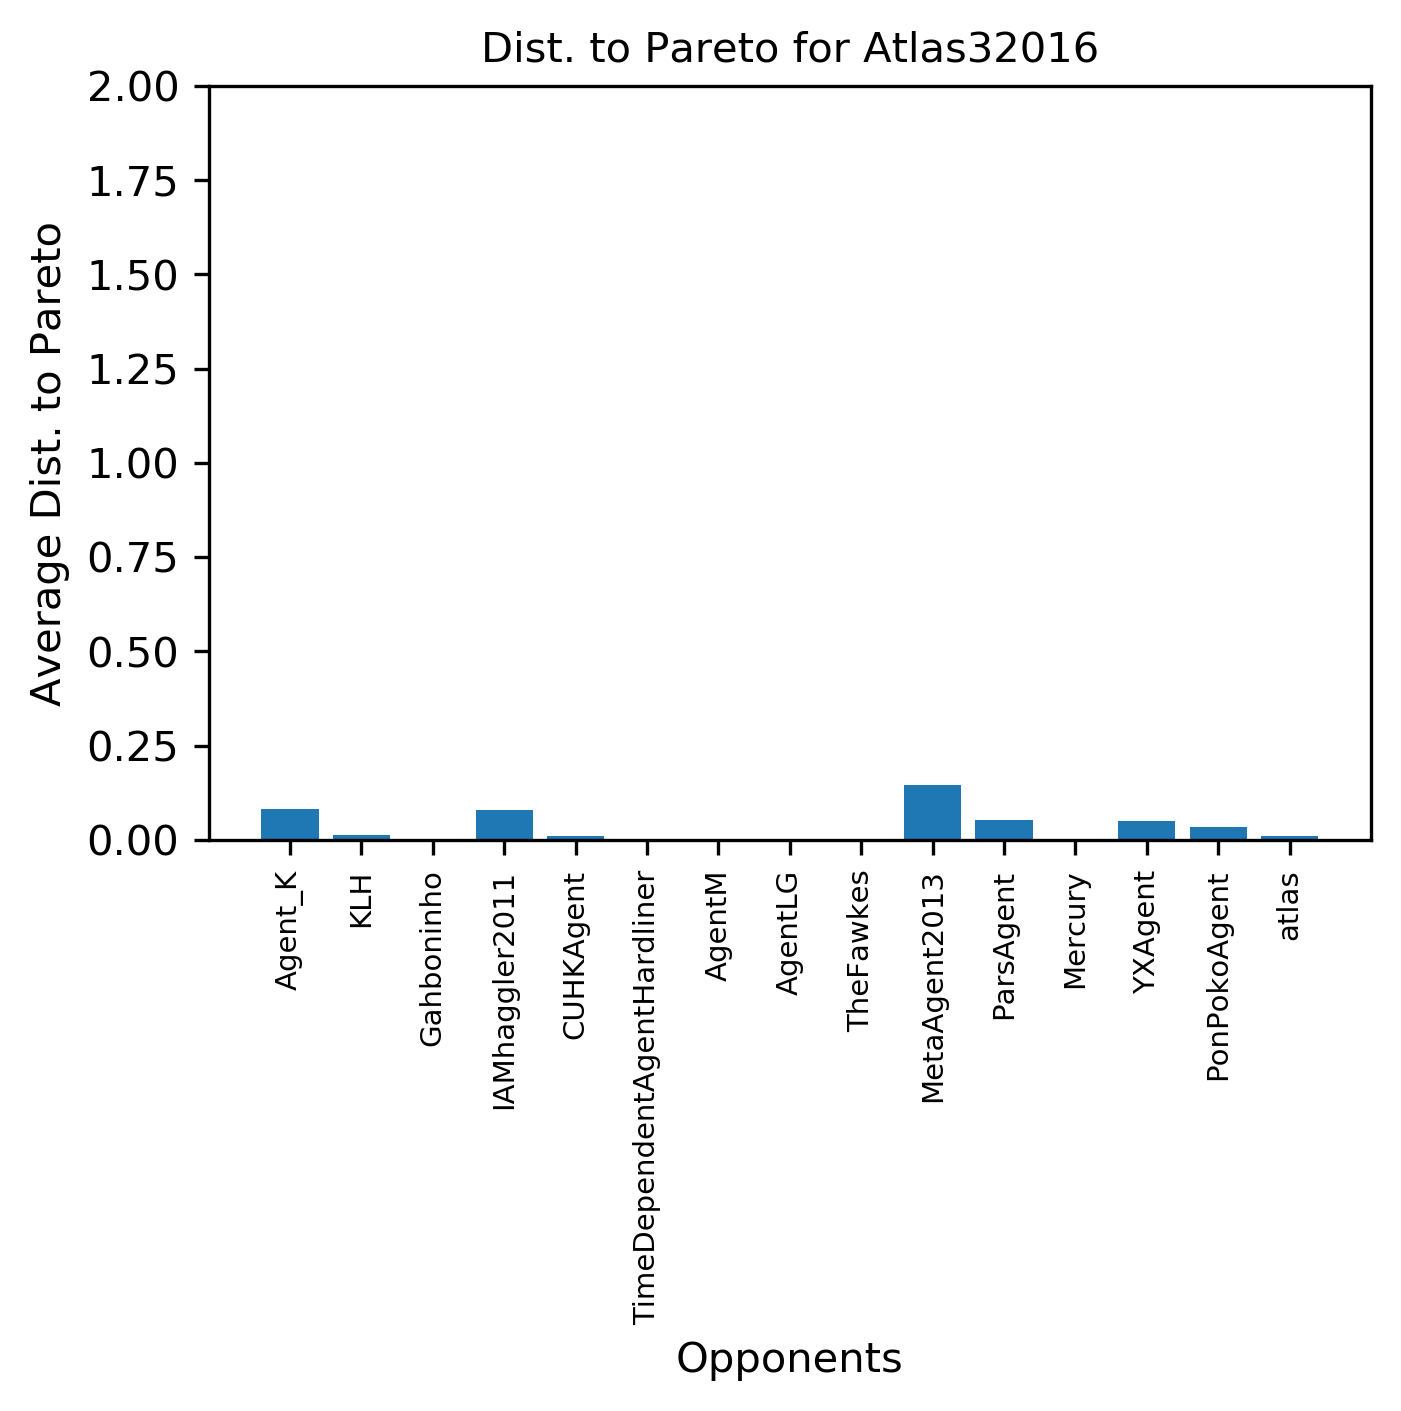

In [25]:
nash_plot('Atlas32016', 'Dist. to Pareto', 1)

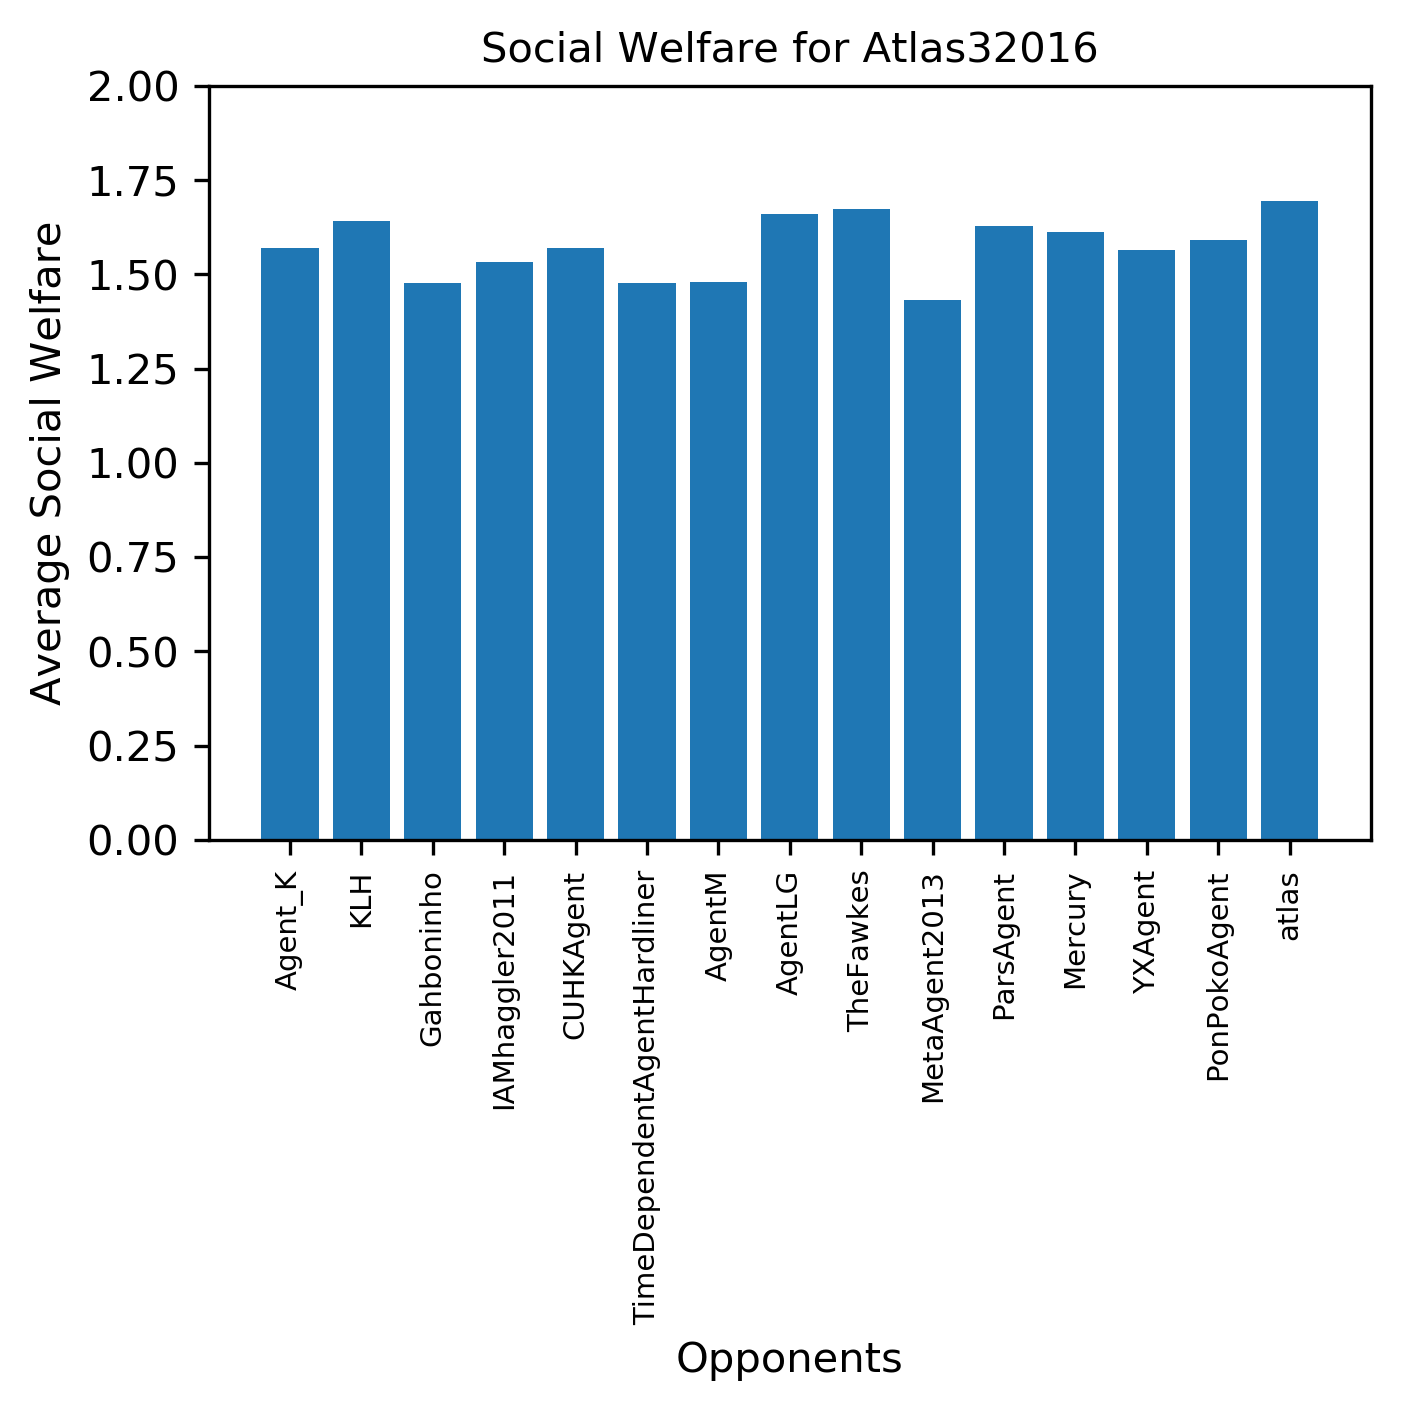

In [26]:
nash_plot('Atlas32016', 'Social Welfare', 1)

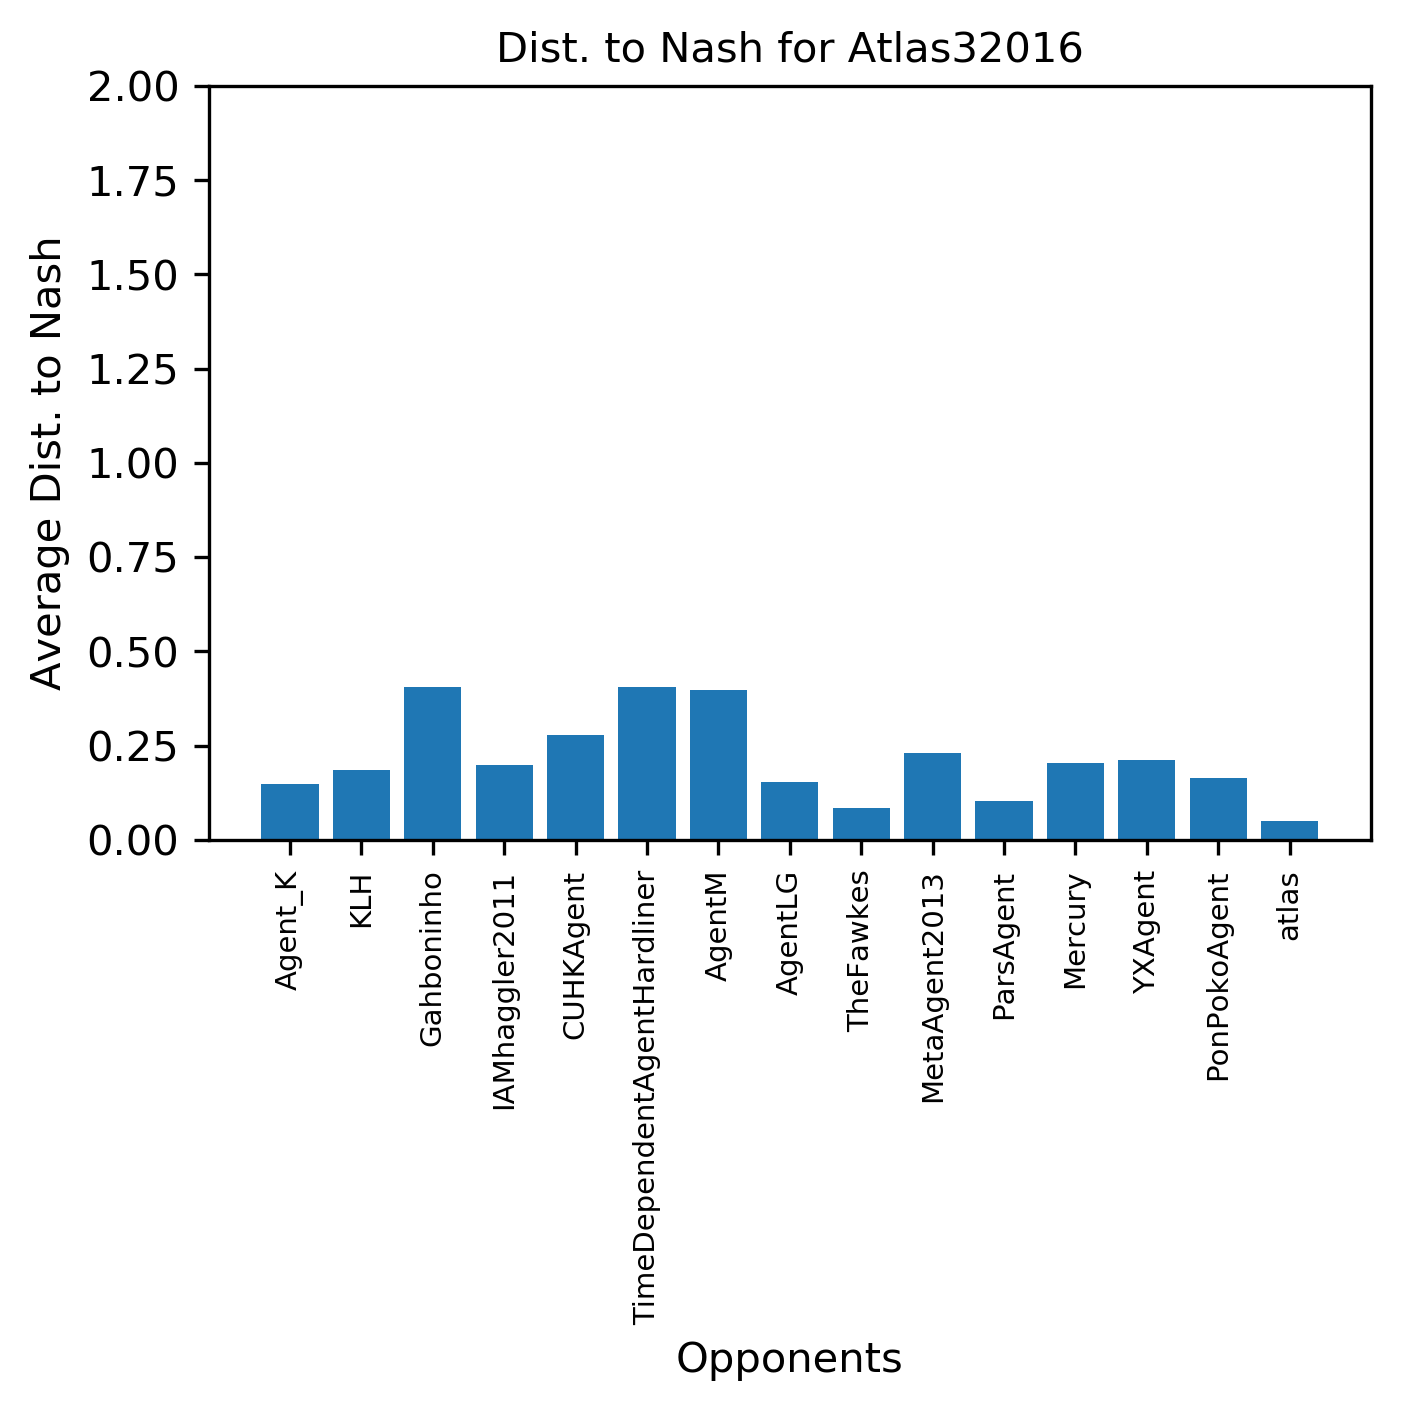

In [27]:
nash_plot('Atlas32016', 'Dist. to Nash', 1)

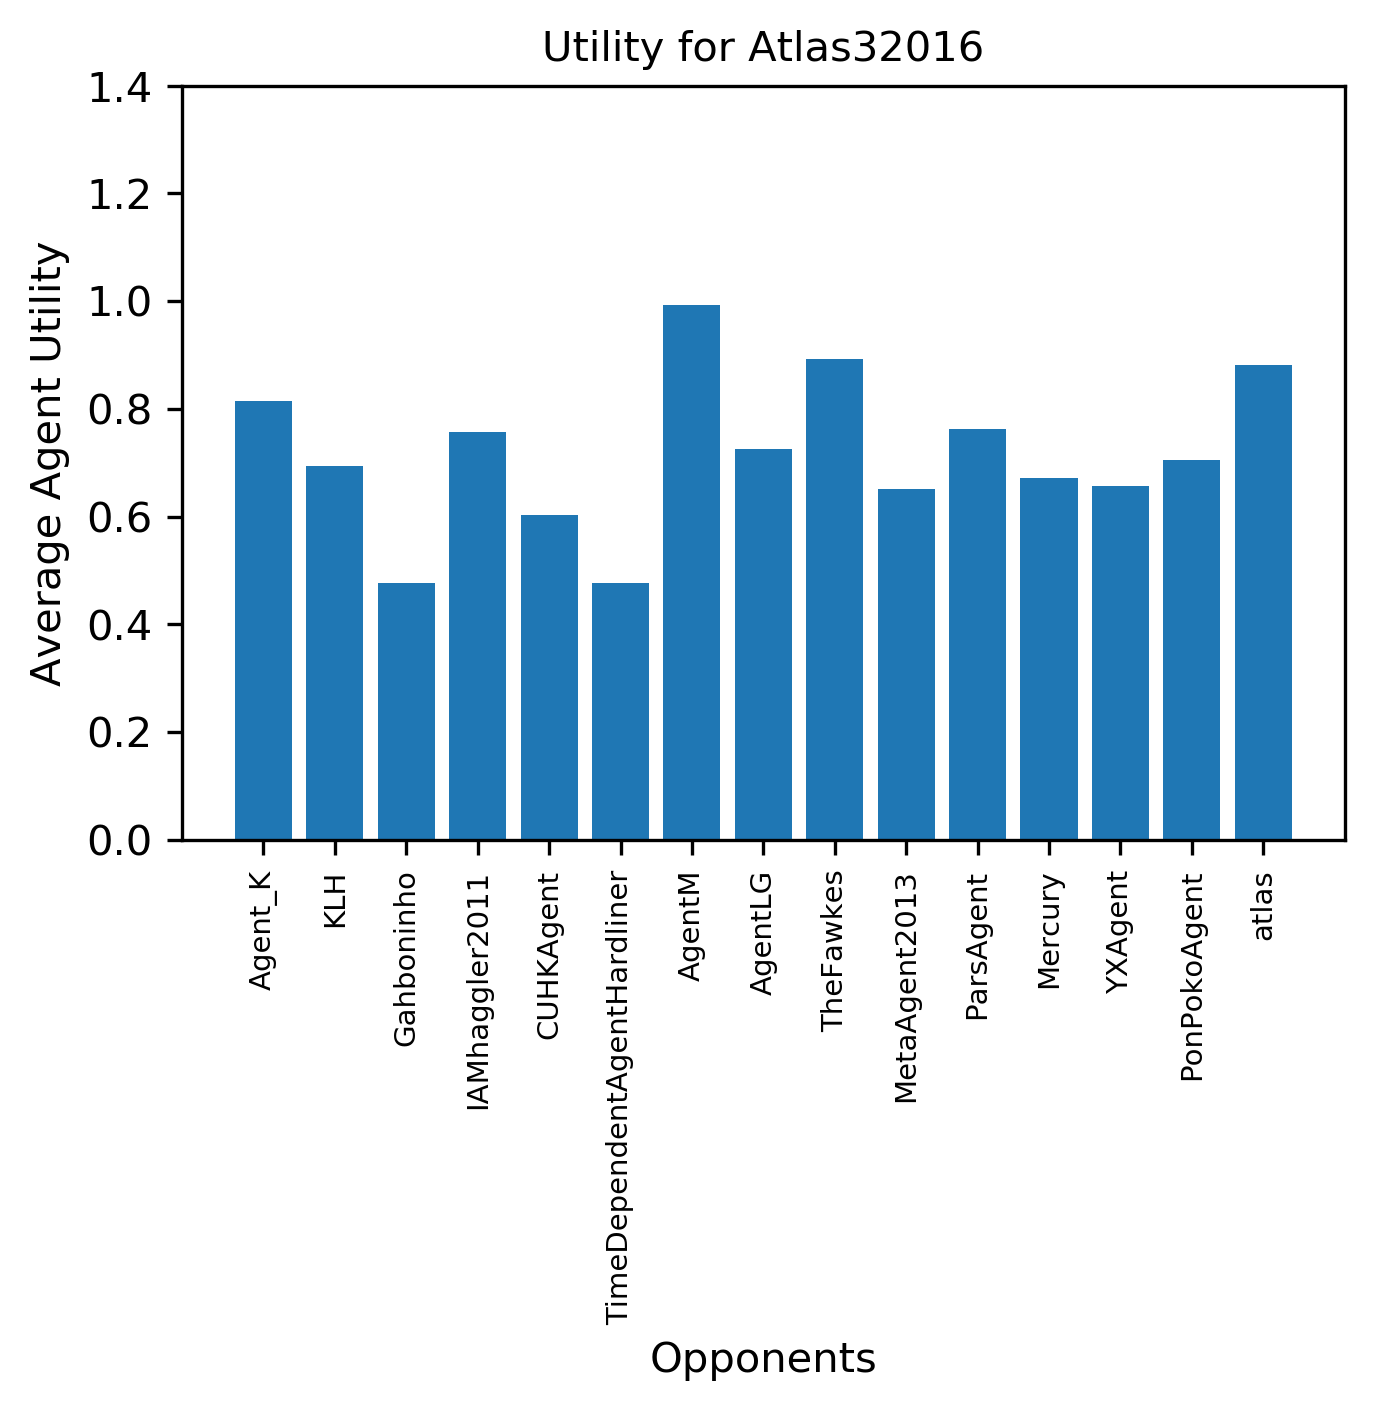

In [28]:
utility_plot('Atlas32016')